In [1]:
import numpy as np
import matplotlib.pyplot as plt

# SVM - standard

## Generate data (linear separable)


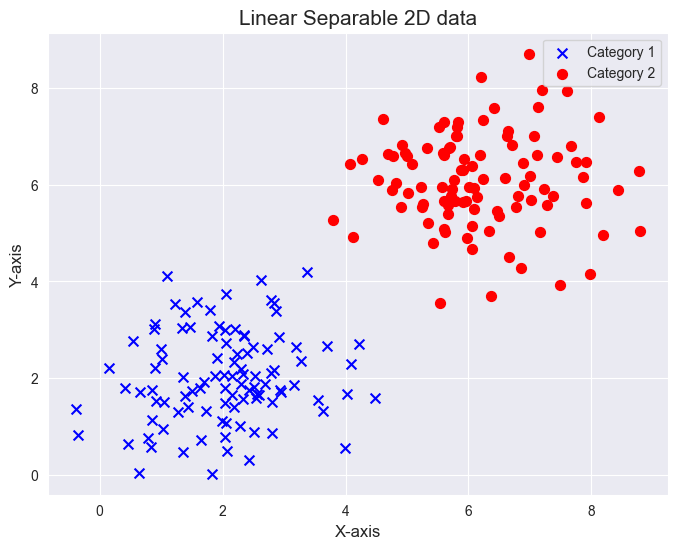

In [2]:
# Set random seed for reproducibility
np.random.seed(4)

# ---- MODIFY ----
# Number of points for each category
# num_points =  # choose number of points
# 
# 
# # Generating random points for crosses and circles
# category1_x =  # remove pass and add code to generate random points -- check numpy for random points from normal distribution
# category1_y =  # add code
# 
# category2_x =  # add code
# category2_y =  # add code

num_points = 100
category1_x = np.random.normal(2, 1, num_points)
category1_y = np.random.normal(2, 1, num_points)
category2_x = np.random.normal(6, 1, num_points)
category2_y = np.random.normal(6, 1, num_points)

# Plotting the crosses and circles
plt.figure(figsize=(8, 6))
plt.scatter(category1_x, category1_y, marker='x', color='blue', label='Category 1', s=50)
plt.scatter(category2_x, category2_y, marker='o', color='red', label='Category 2', s=50)
plt.xlabel('X-axis', fontsize=12)
plt.ylabel('Y-axis', fontsize=12)
plt.title('Linear Separable 2D data', fontsize=15)
plt.legend()
plt.show()

## Make data compatible to Fit the model

In [3]:
# Creating the data and labels
X = np.concatenate((np.column_stack((category1_x, category1_y)),
                    np.column_stack((category2_x, category2_y))), axis=0)
y = np.array([0] * num_points + [1] * num_points)

## Fitting the Model

In [4]:
# ---- MODIFY -----
# Import svm from scikit learn
from sklearn import svm
# Fitting the SVM model
# svm_classifier = pass # define a linear svm
svm_classifier = svm.SVC(kernel='linear', C=1)
# add code to fit the model
svm_classifier.fit(X, y)

SVC(C=1, kernel='linear')

## Plotting the Decision boundary

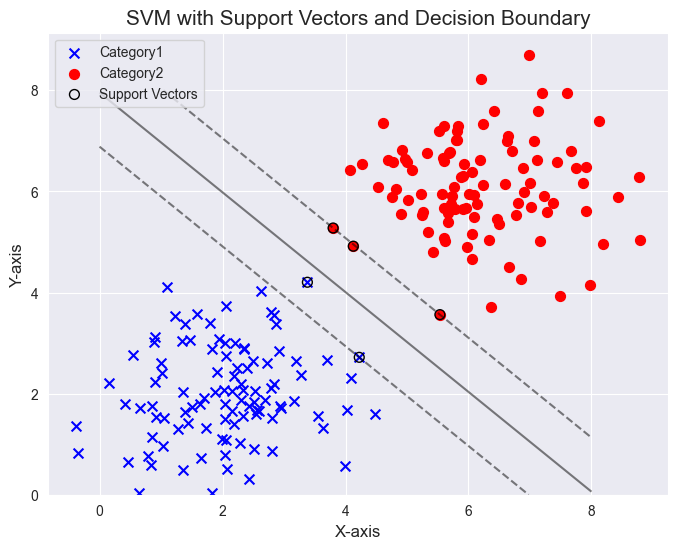

In [5]:
# Creating a mesh to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(0, 8, 100),
                     np.linspace(0, 8, 100))
Z = svm_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the data points, decision boundary, and support vectors
plt.figure(figsize=(8, 6))
plt.scatter(category1_x, category1_y, marker='x', color='blue', label='Category1', s=50)
plt.scatter(category2_x, category2_y, marker='o', color='red', label='Category2', s=50)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1], s=50, facecolors='none', edgecolors='k', label='Support Vectors')
plt.xlabel('X-axis', fontsize=12)
plt.ylabel('Y-axis', fontsize=12)
plt.title('SVM with Support Vectors and Decision Boundary', fontsize=15)
plt.legend()
plt.show()

# Soft SVM

## Fitting the model

In [6]:
# ---- MODIFY -----
# Import svm from scikit learn

# Fitting the SVM model
# soft_svm_classifier =  # define a linear svm, ref svm scikit documentation to look for c
soft_svm_classifier = svm.SVC(kernel='linear', C=0.1)
# add code to fit the model
soft_svm_classifier.fit(X, y)

SVC(C=0.1, kernel='linear')

## Plotting the decision boundary

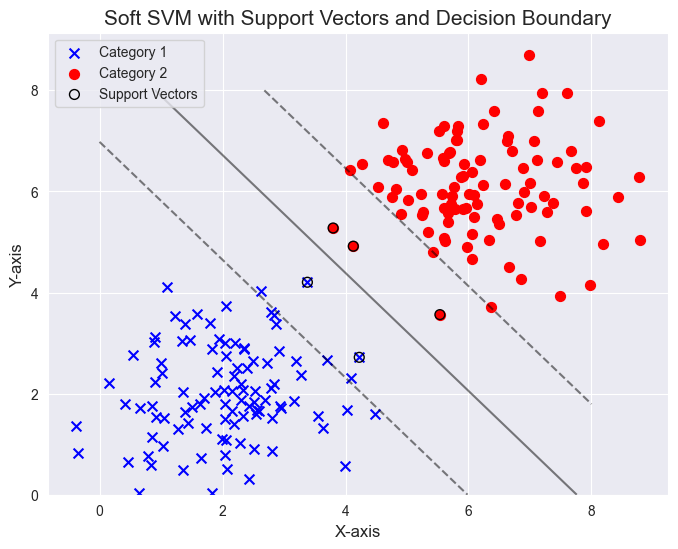

In [7]:
# Creating a mesh to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(0, 8, 100),
                     np.linspace(0, 8, 100))
Z = soft_svm_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the data points, decision boundary, and support vectors
plt.figure(figsize=(8, 6))
plt.scatter(category1_x, category1_y, marker='x', color='blue', label='Category 1', s=50)
plt.scatter(category2_x, category2_y, marker='o', color='red', label='Category 2', s=50)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1], s=50, facecolors='none', edgecolors='k', label='Support Vectors')
plt.xlabel('X-axis', fontsize=12)
plt.ylabel('Y-axis', fontsize=12)
plt.title('Soft SVM with Support Vectors and Decision Boundary', fontsize=15)
plt.legend()
plt.show()

# Kernel SVMs

## Linearly non separable data

In [8]:
# ---- MODIFY ----
# Number of points for each category
# num_points = pass # choos number of points
num_points = 100
# Set random seed for reproducibility
np.random.seed(0)

# Generating circular data
# theta_in = pass # 2 * np.pi * generate random points
# theta_out = pass # 2 * np.pi * generate random points
# r1 = pass #2 * generate random points
# r2 = pass #2 * generate random points + 2.5
theta_in = 2 * np.pi * np.random.random(num_points)
theta_out = 2 * np.pi * np.random.random(num_points)
r1 = 2 * np.random.random(num_points)
r2 = 2 * np.random.random(num_points) + 2.5
# done

x_in = r1 * np.cos(theta_in)
y_in = r1 * np.sin(theta_in)
x_out = r2 * np.cos(theta_out)
y_out = r2 * np.sin(theta_out)


## Making data compatible for model fitting

In [9]:

# Creating the data and labels
X_in = np.column_stack((x_in, y_in))
X_out = np.column_stack((x_out, y_out))
X = np.concatenate((X_in, X_out), axis=0)
y = np.array([0] * num_points + [1] * num_points)

## Model fitting

In [10]:
# ---- MODIFY -----
# Import svm from scikit learn
from sklearn import svm
# Fitting the SVM model
# svm_classifier = pass # define a svm try different kernels
                      # note different kernels have other parameters as well
svm_classifier = svm.SVC(kernel='rbf', C=1, gamma=1)
# add code to fit the model
svm_classifier.fit(X, y)

SVC(C=1, gamma=1)

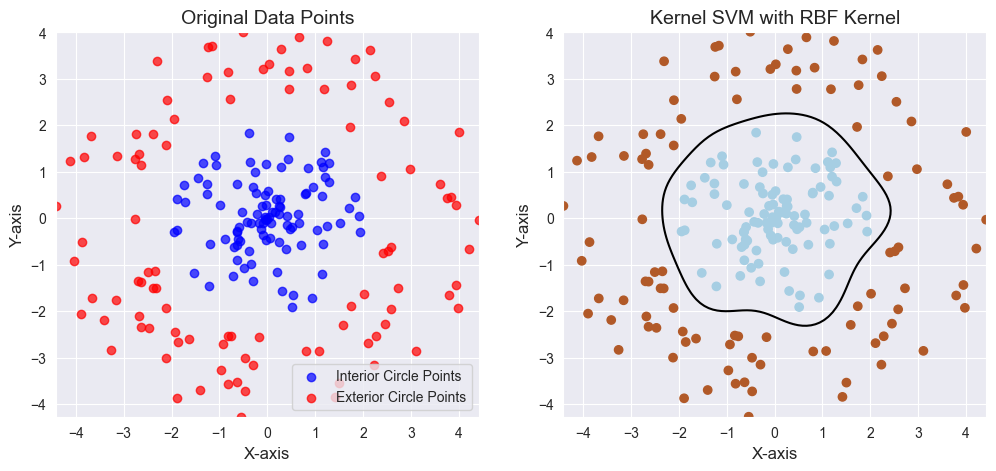

In [11]:
# Applying the transformation with the RBF kernel
x_min, x_max = min(np.min(x_in), np.min(x_out)), max(np.max(x_in), np.max(x_out))
y_min, y_max = min(np.min(y_in), np.min(y_out)), max(np.max(y_in), np.max(y_out))

X_grid, Y_grid = np.meshgrid(np.linspace(x_min, x_max, num_points), np.linspace(y_min, y_max, num_points))
XY = np.vstack([X_grid.ravel(), Y_grid.ravel()]).T
Z = svm_classifier.decision_function(XY).reshape(X_grid.shape)

# Plotting the points before and after transformation
plt.figure(figsize=(12, 5))

# Assigning colors to the categories
color_map = {0: 'blue', 1: 'red'}

plt.subplot(1, 2, 1)
plt.scatter(x_in, y_in, color=color_map[0], label='Interior Circle Points', alpha=0.7)
plt.scatter(x_out, y_out, color=color_map[1], label='Exterior Circle Points', alpha=0.7)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('X-axis', fontsize=12)
plt.ylabel('Y-axis', fontsize=12)
plt.title('Original Data Points', fontsize=14)
plt.legend()

# Plotting the decision boundary
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.contour(X_grid, Y_grid, Z, levels=[0], colors='black')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('X-axis', fontsize=12)
plt.ylabel('Y-axis', fontsize=12)
plt.title('Kernel SVM with RBF Kernel', fontsize=14)
plt.show()


## Plot the Decision boundary

# SVM for Image Classification

## SVD on 2d data - but instead of randomly generating we take from digit images

/Users/poseidon_ktk/Desktop/SEM 7/MbML/lab/venv/lib/python3.9/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


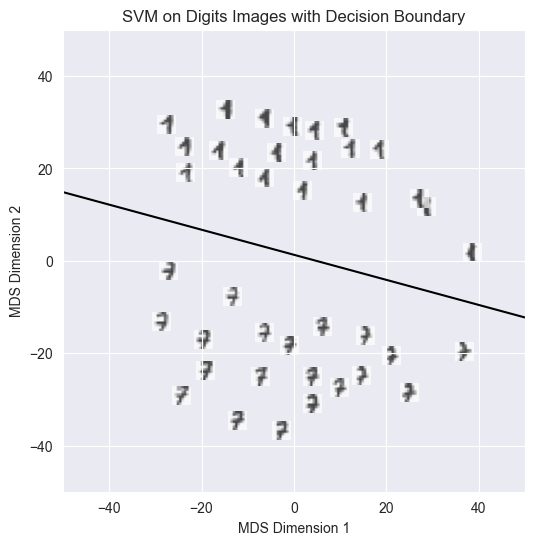

In [12]:
import numpy as np
# --- MODIFY ---
# import load digits dataset from scikit learn
# import multi dimensional scaling
# import svm
from sklearn.datasets import load_digits
from sklearn.manifold import MDS
from sklearn import svm
import matplotlib.pyplot as plt


# Load the digits dataset
# digits = pass # add code to load digits
digits = load_digits()
X, y = digits.data, digits.target

# Extract only '0' and '1' digits for binary classification and limit the dataset size
idx = np.hstack((np.where(y == 7)[0][:20], np.where(y == 1)[0][:20]))
X = X[idx]
y = y[idx]

# --- MODIFY ----
# Apply MDS on the dataset
# mds = pass
mds = MDS(n_components=2)
# X_2d = pass # fit mds
X_2d = mds.fit_transform(X)
# Train the SVM model
# svm_classifier = pass
svm_classifier = svm.SVC(kernel='linear', C=1)
# fit svm with X_2d and y
svm_classifier.fit(X_2d, y)
# done

# Create a scatter plot with images as points and decision boundary
fig, ax = plt.subplots(figsize=(8, 6))
img_side = 2
for i, (image, target) in enumerate(zip(X_2d, y)):
    if target == 0:
        ax.imshow(X[i].reshape(8, 8), extent=(image[0] - img_side, image[0] + img_side, image[1] - img_side, image[1] + img_side), cmap='binary', alpha=0.7)
    else:
        ax.imshow(X[i].reshape(8, 8), extent=(image[0] - img_side, image[0] + img_side, image[1] - img_side, image[1] + img_side), cmap='binary', alpha=0.7)

# Get the separating hyperplane
w = svm_classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-50, 50)
yy = a * xx - (svm_classifier.intercept_[0]) / w[1]

# Plot the decision boundary
plt.plot(xx, yy, 'k-')
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)
ax.set_xlabel('MDS Dimension 1')
ax.set_ylabel('MDS Dimension 2')
ax.set_title('SVM on Digits Images with Decision Boundary')
plt.show() 

## Digit image classification using SVD

Accuracy: 0.9777777777777777
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.94      0.96        34
           4       0.98      0.98      0.98        46
           5       0.96      1.00      0.98        47
           6       1.00      1.00      1.00        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.93      0.94        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  0  1]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  

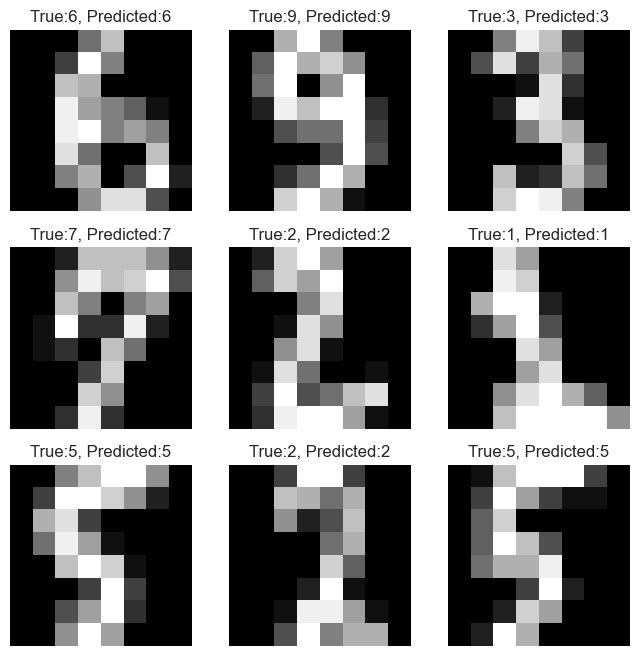

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# --- MODIFY ---
from sklearn.datasets import load_digits
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
np.random.seed(0)

# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# --- MODIFY ---
# Train the SVM classifier
# svm_classifier =  # add code
svm_classifier = svm.SVC(kernel='linear', C=1)
# fit SVM
svm_classifier.fit(X_train, y_train)
# Predict on the test data, X_test using svm_classifier
# y_pred =
y_pred = svm_classifier.predict(X_test)
#####################################
# done
# check accuracy
# try with different kernels
####################################
# accuracy
print("Accuracy:", np.sum(y_pred == y_test) / len(y_test))

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize some of the test results
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"True:{y_test[i]}, Predicted:{y_pred[i]}")
    ax.axis('off')
plt.show()


# Face image classification on lfw people dataset

Accuracy: 0.8571428571428571
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.67      1.00      0.80         4

    accuracy                           0.86        14
   macro avg       0.83      0.90      0.84        14
weighted avg       0.90      0.86      0.86        14

Confusion Matrix:
[[8 2]
 [0 4]]


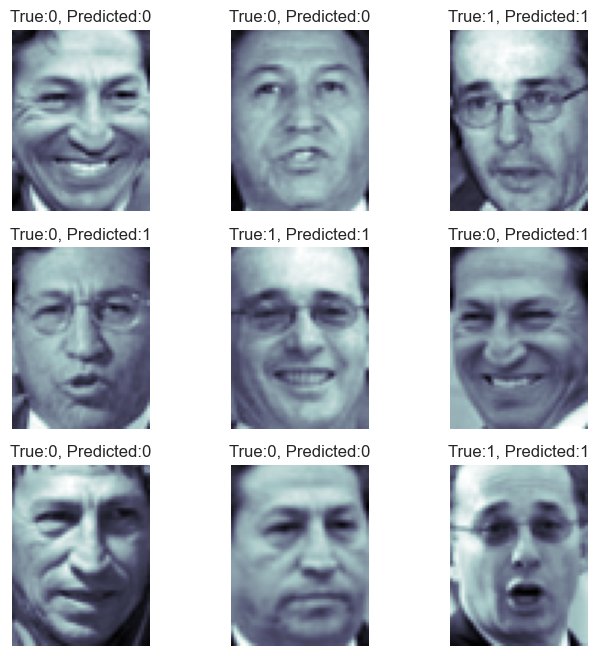

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# --- MODIFY ---
# fetch lfw people dataset from scikit learn
# import svm method
from sklearn.datasets import fetch_lfw_people
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load the faces dataset
# faces = pass # load the images
faces = fetch_lfw_people(min_faces_per_person=30)
X, y = faces.data, faces.target

# Select only two classes for binary classification
class_mask = np.isin(y, [0, 1])
X = X[class_mask]
y = y[class_mask]

# Balance the dataset through undersampling
class_0_indices = np.where(y == 0)[0]
class_1_indices = np.where(y == 1)[0]
num_samples = min(len(class_0_indices), len(class_1_indices))
balanced_indices = np.concatenate([class_0_indices[:num_samples], class_1_indices[:num_samples]])
X = X[balanced_indices]
y = y[balanced_indices]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the SVM classifier
# svm_classifier = pass # add svm
svm_classifier = svm.SVC(kernel='linear', C=100)
# fit svm
svm_classifier.fit(X_train, y_train)
# Predict on the test data
y_pred = svm_classifier.predict(X_test)

#####################################
# done
# check accuracy
# try with different kernels
####################################
print("Accuracy:", np.sum(y_pred == y_test) / len(y_test))
# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize some of the test results
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(faces.images.shape[1], faces.images.shape[2]), cmap='bone')
    ax.set_title(f"True:{y_test[i]}, Predicted:{y_pred[i]}")
    ax.axis('off')
plt.show()